In [24]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
import matplotlib.image as pltimg
import graphviz 

############################
from sklearn import preprocessing, metrics
from sklearn.ensemble import RandomForestRegressor,VotingClassifier,RandomForestClassifier
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_predict, KFold, train_test_split,cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.externals import joblib
from sklearn.linear_model import LinearRegression
from sklearn.inspection import permutation_importance
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error,r2_score
from sklearn.tree._export import plot_tree



In [7]:
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy; print("NumPy", numpy.__version__)
import scipy; print("SciPy", scipy.__version__)
import sklearn; print("Scikit-Learn", sklearn.__version__)

Windows-10-10.0.18362-SP0
Python 3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
NumPy 1.18.1
SciPy 1.4.1
Scikit-Learn 0.22.1


In [6]:
#from google.colab import drive

#drive.mount('/content/gdrive')
#root_path = 'gdrive/My Drive/your_project_folder/'  #change dir to your project folder

In [5]:
df_Nacional = pd.read_csv('../microdadosEnem_Nacional_Amostragem.csv', sep = ';', encoding='ISO 8859-1')
df_Nacional

,Unnamed: 0,NU_INSCRICAO,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,193,180008411121,AL,19.0,1.0,0.0,3.0,1.0,1.0,0.0,...,A,B,B,A,B,A,B,B,A,A
1,283,180008788016,AL,40.0,0.0,2.0,3.0,6.0,1.0,0.0,...,A,B,B,A,B,A,A,B,A,A
2,305,180008411503,AL,24.0,1.0,0.0,3.0,7.0,1.0,0.0,...,B,B,B,A,B,A,A,B,A,C
3,336,180008257102,AL,28.0,0.0,0.0,3.0,8.0,1.0,0.0,...,A,B,A,A,D,A,A,B,A,A
4,372,180008309661,AL,17.0,1.0,0.0,3.0,0.0,1.0,0.0,...,A,C,B,A,C,A,A,A,B,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64600,5513028,180013469026,AL,34.0,1.0,0.0,3.0,0.0,1.0,0.0,...,A,B,A,B,B,B,B,A,A,A
64601,5513039,180013985741,AL,20.0,0.0,0.0,3.0,2.0,1.0,0.0,...,A,B,A,A,B,A,A,B,A,A
64602,5513342,180013955750,AL,18.0,1.0,0.0,3.0,0.0,2.0,0.0,...,A,A,A,A,B,A,A,A,B,A
64603,5513369,180013983882,AL,18.0,1.0,0.0,2.0,0.0,1.0,0.0,...,A,B,B,A,C,A,B,B,B,B


In [6]:
df_Nacional = df_Nacional.loc[:, ~df_Nacional.columns.str.contains('^Unnamed')]
#df_Alagoas = df_Alagoas[0:10000]

feature_cols = [x for x in df_Nacional.columns if x != 'NU_NOTA_MT']
X = df_Nacional[feature_cols]
Y = df_Nacional['NU_NOTA_MT']



In [7]:
df_Nacional.shape

(64605, 41)

# Variável alvo é a nota de matematica dos participantes

In [8]:
# Leitura dos datasets de treino e teste e criação do df de resposta
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=0)
#df_resposta = pd.DataFrame()
print(X.shape, Y.shape, X_train.shape, y_train.shape ,X_test.shape, y_test.shape)

(64605, 40) (64605,) (45223, 40) (45223,) (19382, 40) (19382,)


# Pré-processamento

In [9]:
#dataframe que irá receber a resposta dada pelo sistema
df_resposta = pd.DataFrame()

#dataframe que guarda a nota orginal obtida pelo participante
df_resposta['NU_INSCRICAO'] = X_test['NU_INSCRICAO']
df_resposta['NU_NOTA_MT'] = y_test

In [9]:
#df_Alagoas.columns

In [10]:
numeric_features = ['NU_IDADE', 'TP_SEXO','TP_ESTADO_CIVIL', 'TP_COR_RACA','TP_ANO_CONCLUIU', 'TP_ESCOLA',
                    'IN_TREINEIRO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO',  'Q005']

numeric_transformer = Pipeline(   steps=[ ('scaler', StandardScaler())])

categorical_features = ['Q001', 'Q002', 'Q003', 'Q004','Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011','Q012', 'Q013', 'Q014',
                        'Q015','Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'Q026', 'Q027']

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

X_train = X_train[numeric_features + categorical_features]
X_test = X_test[numeric_features + categorical_features]

preprocessing = ColumnTransformer(transformers=[
                                        ('num', numeric_transformer, numeric_features),                                       
                                        ('cat', categorical_transformer, categorical_features),  
])

In [14]:
feature_names= numeric_features + categorical_features
len(feature_names)
print(feature_names)

['NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'IN_TREINEIRO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO', 'Q005', 'Q001', 'Q002', 'Q003', 'Q004', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025', 'Q026', 'Q027']


In [12]:
#rint(X_train, X_test)
#https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-evaluating-estimator-performance

# Aplicando o regressor

## Random Forest

In [11]:
#rf = RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=42 )
rf = Pipeline([
    ('preprocess', preprocessing),
    ('regressor', RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=42 ))
])
rf.fit(X_train, y_train)
print("RF train accuracy: %0.3f" % rf.score(X_train, y_train))
print("RF test accuracy: %0.3f" % rf.score(X_test, y_test))
#y_pred = rf.predict(X_test)



#print(y_pred)

RF train accuracy: 0.893
RF test accuracy: 0.402


## Regressão Linear

In [12]:
lr =  Pipeline([
    ('preprocess', preprocessing),
    ('regressor', LinearRegression())
])
lr.fit(X_train, y_train)

# score = Return the coefficient of determination R^2 of the prediction
print("RN train R²: %0.3f" % lr.score(X_train, y_train))
print("RN test R²: %0.3f" % lr.score(X_test, y_test))

RN train R²: 0.438
RN test R²: 0.438


## Rede neural

In [13]:
rn = Pipeline([
    ('preprocess', preprocessing),
    ('regressor', MLPRegressor(hidden_layer_sizes=(50, 50),tol=1e-2,max_iter=500, random_state=0))
])
rn.fit(X_train, y_train)

# score = Return the coefficient of determination R^2 of the prediction
print("RN train R²: %0.3f" % rn.score(X_train, y_train))
print("RN test R²: %0.3f" % rn.score(X_test, y_test))


RN train R²: 0.485
RN test R²: 0.461


# Árvore de decisão

In [14]:
dtree = Pipeline([
    ('preprocess', preprocessing),
    ('regressor', DecisionTreeRegressor(random_state=0))
])
dtree.fit(X_train, y_train)

# # score = Return the coefficient of determination R^2 of the prediction
print("Coefficient of determination R² of the prediction train.: %0.3f" % dtree.score(X_train, y_train))
print("Coefficient of determination R² of the prediction test: %0.3f" % dtree.score(X_test, y_test))
#x = dtree.named_steps['regressor'].feature_importances_


Coefficient of determination R² of the prediction train.: 1.000
Coefficient of determination R² of the prediction test: -0.112


In [15]:
#df_resposta['NU_NOTA_MT_predRF'] = y_pred
df_metricas = pd.DataFrame()
df_resposta.shape

df_features_importance =  pd.DataFrame()


In [16]:
def GuardaFeatures(clf, label):
    
    df_features_importance[label] = clf.named_steps['regressor'].feature_importances_
            
    ohe                           = (clf.named_steps['preprocess'].named_transformers_['cat'].named_steps['onehot'])
            
    feature_names                 = ohe.get_feature_names(input_features=categorical_features)
            
    df_features_importance['feature_names' + label] =  np.r_[feature_names, numeric_features] 
    

# Aplicando os regressores

In [17]:
import time
scorings=['r2']

clfs = [rf, lr, rn, dtree]
start_time = time.time()
valores=[]
i=0
for clf, label in zip(clfs, ['Random Forest', 'Regressão Linear', 'Rede Neural', 'Árvore de decisão']):
    
        tempro_processamento = time.time()
        
        print( "Processando o modelo: [%s]" % label)
        
       # cv = cross_validate(clf, X_train, y_train, cv=5,  n_jobs=-1, verbose=0, return_train_score=True)        
        cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
        
        y_pred = cross_val_predict(clf, X_test, y_test, n_jobs=-1, verbose=0)     
        
        df_resposta['NU_NOTA_MT_'+ label] = y_pred
        
        df_metricas['Modelo']                    = ['Random Forest', 'Regressão Linear', 'Rede Neural', 'Árvore de decisão']
        
        df_metricas.loc[i,'Max_Error']           = round(max_error(y_test, y_pred), 2)
        df_metricas.loc[i,'MAE']                 = round(mean_absolute_error(y_test, y_pred), 2)         
        df_metricas.loc[i,'R²']                  = round(r2_score(y_test, y_pred), 2)
        df_metricas.loc[i,'MSE']                 = round(mean_squared_error(y_test, y_pred), 2)
        df_metricas.loc[i,'CV scores mean']      = round(cv_scores.mean(), 2)
        df_metricas.loc[i,'CV scores std']       = round(cv_scores.std(), 2)
          
        
      
        if(label == "Random Forest"):
           
            GuardaFeatures(clf, label)
           
        elif(label == "Árvore de decisão"):
            
            GuardaFeatures(clf, label)
            
            
        tempo = (time.time() - tempro_processamento)
        tempoMinutos =  tempo/60  
        df_metricas.loc[i, 'Tempo de processamento min'] = round( tempoMinutos, 2)
        
        print("Tempo de processamento [%s] em minutos: %f  " %( label, round( tempoMinutos, 2) ) )
        print('\n')
        i+=1
       
        #print("Accuracy: %0.2f (+/- %0.2f) [%s]" % ( cv_scores.mean(),  cv_scores.std(), label))
        
       
    
    
elapsed_time = time.time() - start_time

print("tempo de processamento total em minutos:" , (round(elapsed_time/60, 2)))
print('Processamento finalizado')
#print(elapsed_time)

Processando o modelo: [Random Forest]
Tempo de processamento [Random Forest] em minutos: 8.650000  


Processando o modelo: [Regressão Linear]
Tempo de processamento [Regressão Linear] em minutos: 0.330000  


Processando o modelo: [Rede Neural]


C:\Users\aleon\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Tempo de processamento [Rede Neural] em minutos: 22.570000  


Processando o modelo: [Árvore de decisão]
Tempo de processamento [Árvore de decisão] em minutos: 2.390000  


tempo de processamento total em minutos: 33.93
Processamento finalizado


# Salvando os dataframes com os resultados

In [18]:

df_resposta[['NU_NOTA_MT_Random Forest','NU_NOTA_MT_Regressão Linear','NU_NOTA_MT_Rede Neural']]= df_resposta[['NU_NOTA_MT_Random Forest','NU_NOTA_MT_Regressão Linear','NU_NOTA_MT_Rede Neural' ]].applymap("{0:.1f}".format).astype('float64')



In [19]:
df_metricas


,Modelo,Max_Error,MAE,R²,MSE,CV scores mean,CV scores std,Tempo de processamento min
0,Random Forest,485.11,58.77,0.40,5428.39,0.40,0.01,8.65
1,Regressão Linear,513.67,57.01,0.44,5072.02,0.43,0.01,0.33
2,Rede Neural,499.38,55.96,0.45,4965.24,0.45,0.02,22.57
3,Árvore de decisão,647.80,78.71,-0.12,10057.61,-0.11,0.01,2.39


In [20]:
#Salvar num arquivo csv o dataframe com os dados de Alagoas

df_resposta.to_csv('microdadosRespostaNacinal.csv', sep = ';', encoding='ISO 8859-1')
df_features_importance.to_csv('microdadosFeaturesImportancesBR.csv', sep = ';', encoding='ISO 8859-1')
df_metricas.to_csv('microdadosMetricasNacional.csv', sep = ';', encoding='ISO 8859-1')

In [113]:
from time import gmtime, strftime
df_metricas
#valores
print("tempo de processamento em minutos:" , (round(elapsed_time/60, 2)))
print(time.time() )




tempo de processamento em minutos: 8.99
1587849454.7471185


In [123]:
#df_resposta.sort_index(inplace= True)
df_resposta.sort_values(by='NU_NOTA_MT', inplace = True)
df_resposta

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_MT_Random Forest,NU_NOTA_MT_Regressão Linear,NU_NOTA_MT_Rede Neural,NU_NOTA_MT_Árvore de decisão
38470,180011090787,0.0,320.88,368.904458,492.857858,445.6
14046,180008766597,0.0,436.19,374.507918,541.028103,429.5
50395,180012184190,0.0,485.11,513.666849,548.887518,514.4
22686,180007519102,0.0,368.58,350.851999,470.231351,429.1
44244,180011344996,361.2,514.50,533.929467,499.979182,521.7
...,...,...,...,...,...,...
40045,180011021843,904.0,743.53,655.499689,752.562476,755.1
63249,180012914250,906.0,764.88,726.046851,787.212515,769.3
38975,180010706830,925.8,627.58,621.843132,545.033304,685.5
55576,180013033911,949.0,653.92,666.319668,665.978163,717.6


In [124]:
df_resposta.columns

Index(['NU_INSCRICAO', 'NU_NOTA_MT', 'NU_NOTA_MT_Random Forest',
       'NU_NOTA_MT_Regressão Linear', 'NU_NOTA_MT_Rede Neural',
       'NU_NOTA_MT_Árvore de decisão'],
      dtype='object')

In [29]:
x_ticks = np.arange(0, len(df_resposta['NU_INSCRICAO']))
x_ticks


array([    0,     1,     2, ..., 19379, 19380, 19381])

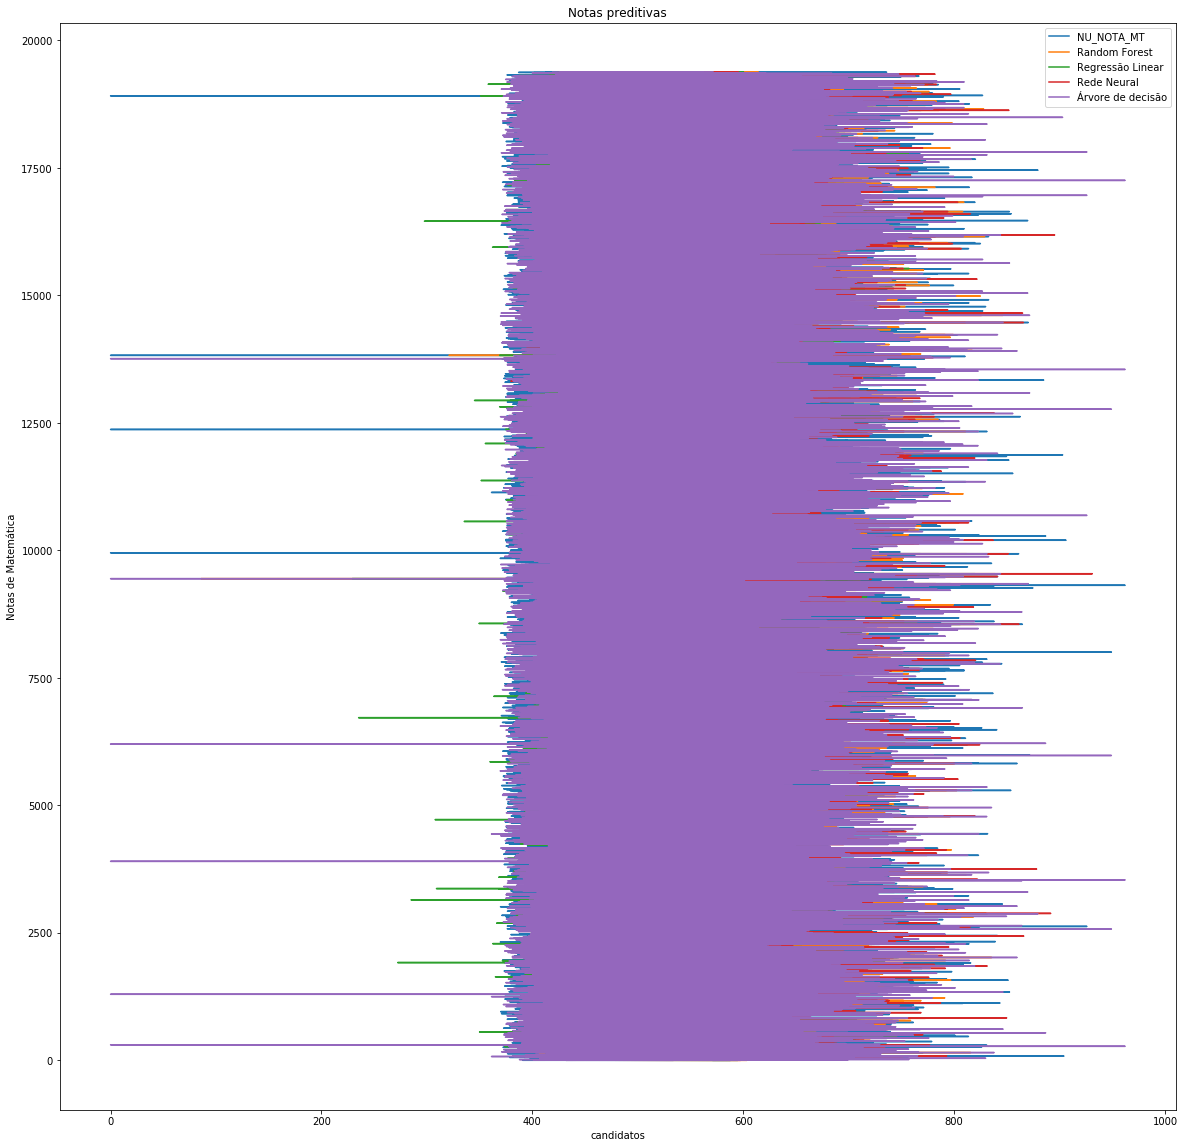

In [30]:
labels = ['NU_NOTA_MT','Random Forest', 'Regressão Linear', 'Rede Neural', 'Árvore de decisão']
colunas = ['NU_NOTA_MT', 'NU_NOTA_MT_Random Forest',
       'NU_NOTA_MT_Regressão Linear', 'NU_NOTA_MT_Rede Neural',
       'NU_NOTA_MT_Árvore de decisão']


fig, ax = plt.subplots(figsize=(20, 20))

for label, coluna in zip(labels, colunas):
    ax.plot(df_resposta[coluna],x_ticks, label = label)


plt.xlabel('candidatos')
plt.ylabel('Notas de Matemática')
plt.title("Notas preditivas")
plt.legend()
plt.show()

## Feature Importance Random Forest

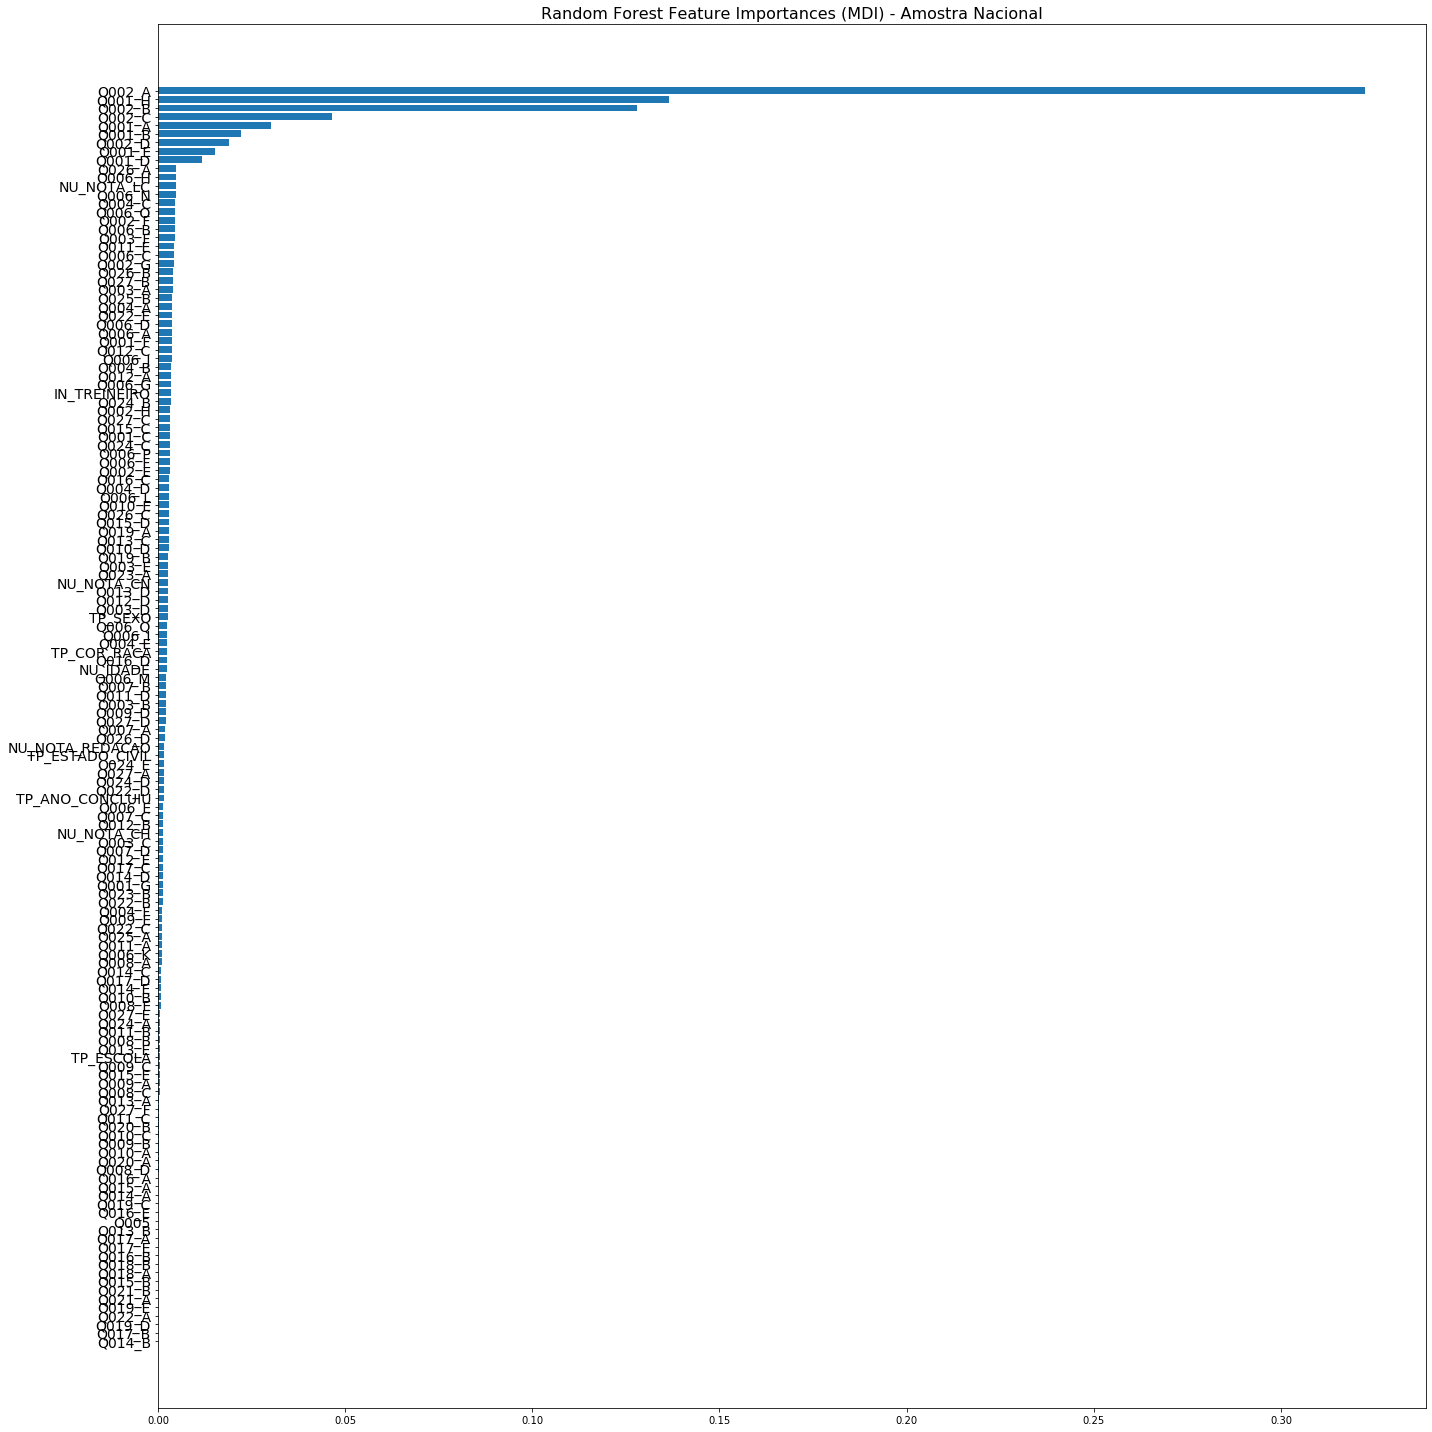

In [34]:
ohe = (rf.named_steps['preprocess']
         .named_transformers_['cat']
         .named_steps['onehot'])
feature_names = ohe.get_feature_names(input_features=categorical_features)
feature_names = np.r_[feature_names, numeric_features]

tree_feature_importances = (rf.named_steps['regressor'].feature_importances_)

sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots(figsize=(20, 20))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticklabels(feature_names[sorted_idx], fontsize = 14)
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances (MDI) - Amostra Nacional", fontsize = 16)
fig.tight_layout()
plt.savefig('imagens/featuresImportancesBR-RF.png', format='png')
plt.show()

## Feature importances Árvore de decisão

In [ ]:
ohe = (rf.named_steps['preprocess']
         .named_transformers_['cat']
         .named_steps['onehot'])
feature_names = ohe.get_feature_names(input_features=categorical_features)
feature_names = np.r_[feature_names, numeric_features]

tree_feature_importances = (dtree.named_steps['regressor'].feature_importances_)

sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots(figsize=(20, 20))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticklabels(feature_names[sorted_idx], fontsize = 14)
ax.set_yticks(y_ticks)
ax.set_title("Árvore de decisão Feature Importances (MDI) - Amostra Nacional", fontsize = 16)
fig.tight_layout()
plt.savefig('imagens/featuresImportancesBR-AD.png', format='png')
plt.show()

In [38]:
#sns.catplot(x=X_test.Q001, y=df_resposta.NU_NOTA_MT_RF);

# Plotando a distribuíção das notas

## Permutation importance Random Forest

TypeError: set_ylabel() missing 1 required positional argument: 'ylabel'

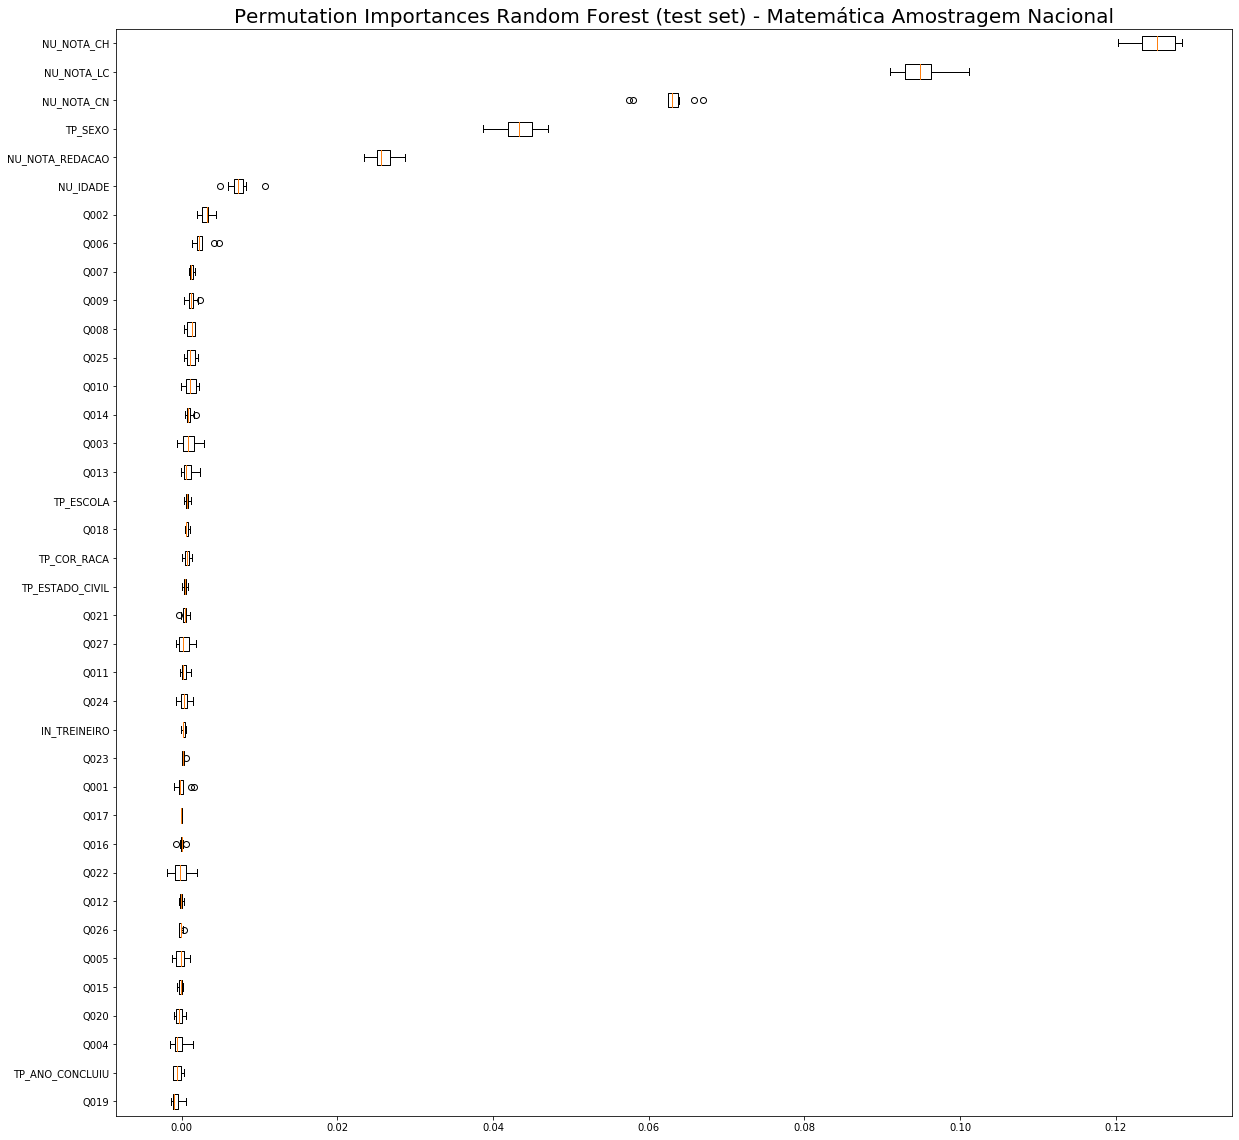

In [35]:
result = permutation_importance(rf, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)

sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(20, 20))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances Random Forest (test set) - Matemática Amostragem Nacional", fontsize=20)
ax.set_ylabel(fontsize = 13)
fig.tight_layout(pad=1.08, h_pad=5, w_pad=5, rect=None)
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
plt.savefig('imagens/featuresImportancesRF-BR.png', format='png')

plt.show()

## Permutation importance Árvore de decisão

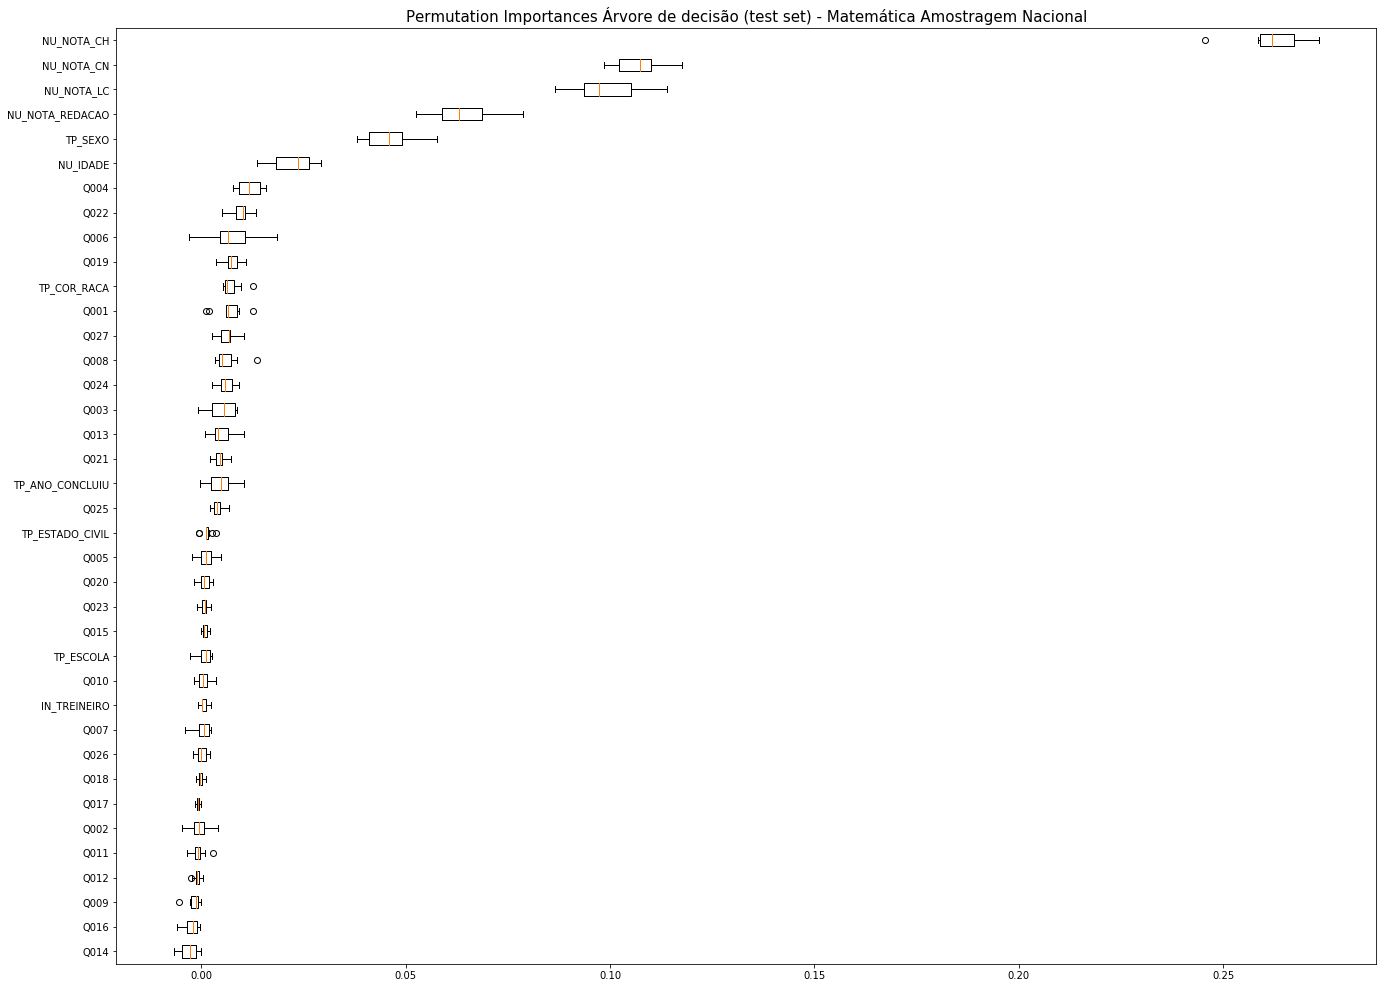

In [32]:
result_dt = permutation_importance(dtree, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result_dt.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(20, 20))
ax.boxplot(result_dt.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances Árvore de decisão (test set) - Matemática Amostragem Nacional", fontsize=15)

fig.tight_layout(pad=1.08, h_pad=5, w_pad=5, rect=None)
plt.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
plt.savefig('imagens/permutationImportances_DtreeBR.png', format='png')

plt.show()

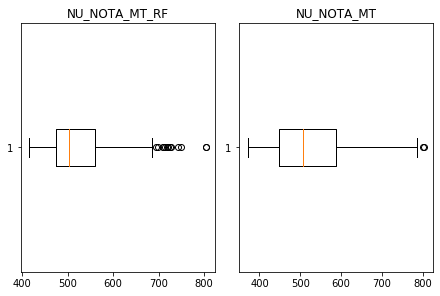

In [39]:
fig, axs = plt.subplots(1, 2, figsize=[6,4], constrained_layout=True)

idx=['NU_NOTA_MT_RF', 'NU_NOTA_MT']
for ax, i in zip(axs, ['NU_NOTA_MT_RF', 'NU_NOTA_MT']):
    ax.set_title(i)
    ax.boxplot(df_resposta[i], vert=False)

#plt.savefig('imagens/featuresImportances.png', format='png')

plt.show()


Text(0.5, 1.0, 'Média de votos em filmes no TMBD 5000')

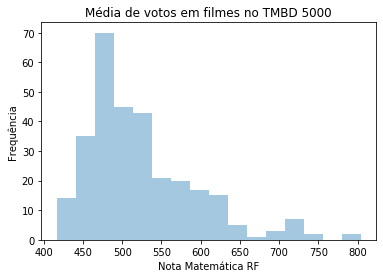

In [36]:
ax = sns.distplot(df_resposta['NU_NOTA_MT_RF'], norm_hist= False, kde= False)
ax.set(xlabel='Nota Matemática RF', ylabel='Frequência')
ax.set_title('')

Text(0.5, 1.0, 'Distribuição das notas de matemática RF')

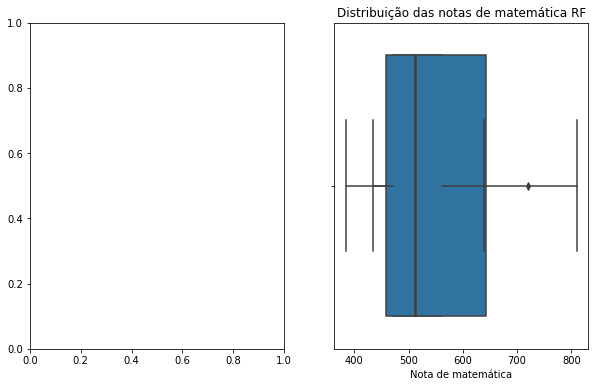

In [15]:
fig, ax = plt.subplots(1,2,figsize=(10, 6))
axs[0][0] = sns.boxplot(df_resposta.NU_NOTA_MT_RF)
axs[0][1] = sns.boxplot(df_resposta.NU_NOTA_MT)
plt.xlabel('Nota de matemática')
plt.title('Distribuição das notas de matemática RF')

In [50]:
y_ticks = np.arange(0,len(feature_names))
y_ticks
df_resposta['NU_NOTA_MT_Random Forest'].shape
for x in categorical_features:
     v = X_train[x]
df_cat = pd.DataFrame()
df_cat = X_test[categorical_features]
#cat = pd.concat([cat, df_resposta], axis=1, join='inner')



,Q001_A,Q001_B,Q001_C,Q001_E,Q001_G,Q001_H,Q002_A,Q002_B,Q002_C,Q002_D,...,Q025_A,Q025_B,Q026_A,Q026_B,Q026_C,Q027_A,Q027_B,Q027_C,Q027_D,Q027_E
26,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
86,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
55,0,1,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
75,0,1,0,0,0,0,0,0,1,0,...,0,1,0,1,0,1,0,0,0,0
93,0,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
16,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,1,0,0,0,0
73,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
54,0,1,0,0,0,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
95,0,0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0


In [35]:
len(feature_names)
len(categorical_features)
df_resposta['NU_NOTA_MT_RF'].shape

(300,)

In [2]:
letras = ['A', 'B', 'C',  'D',
                 'E',
                 'F',
                 'G',
                 'H',
                 'I',
                 'J',
                 'K',
                 'L',
                 'M',
                 'N',
                 'O',
                 'P',
                 'Q']

In [54]:


print(df_cat.groupby("Q001"))

ValueError: 'c' argument has 45 elements, which is not acceptable for use with 'x' with size 300, 'y' with size 300.

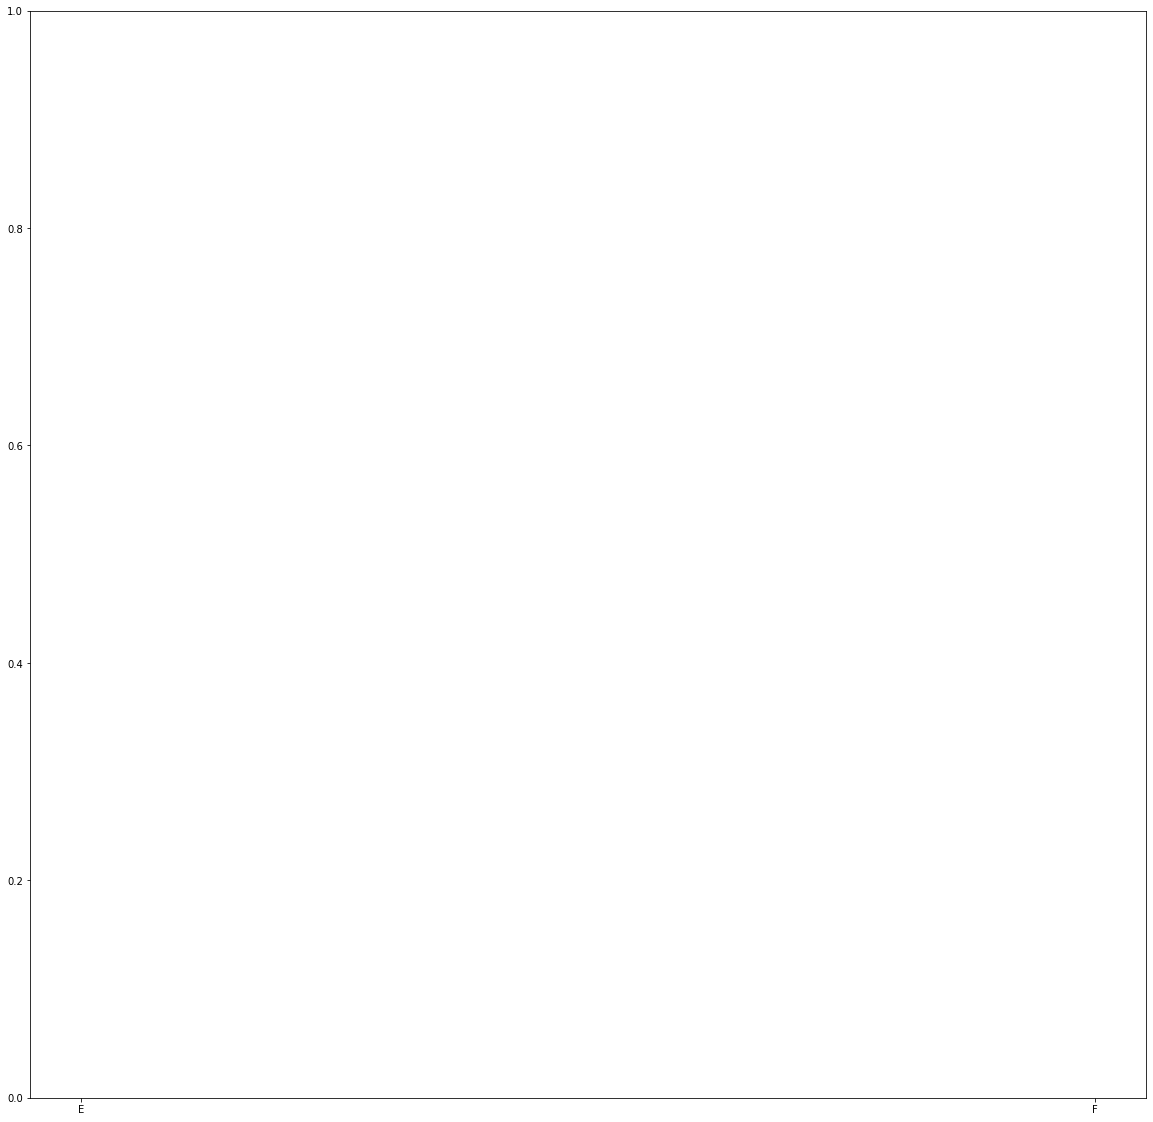

In [132]:


y_ticks = np.arange(0,len(feature_names))
c = np.random.randint(1, 20, size=N)
fig, ax = plt.subplots(figsize=(20, 20))
labels = categorical_features
for l  in  labels:  
    ax.scatter(X_test[l], df_resposta['NU_NOTA_MT_Random Forest'], alpha=0.5,  c=c )
    ax.set_yticklabels(l)
    ax.set_yticks(y_ticks)
    
plt.grid(True)
plt.xlabel('features categóricas', fontsize=15)
plt.ylabel('NU_NOTA_MT_RF', fontsize=15)
plt.title('Gráfico de dispersão', fontsize=19)

plt.savefig('imagens/graficoDispersao.png', format='png')
plt.show()

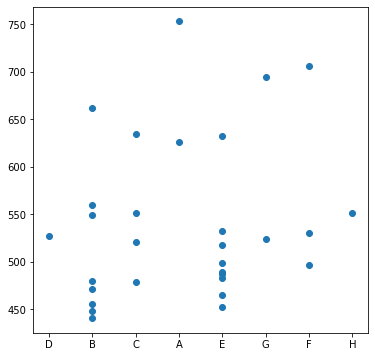

In [56]:
import matplotlib as mpl
cmap = mpl.cm.cool
norm = mpl.colors.Normalize(vmin=5, vmax=10)
fig, ax = plt.subplots(figsize=(6, 6))
#print(X_test.sort_values('Q001')['Q001'])
ax.scatter(, df_resposta['NU_NOTA_MT_Random Forest'])

In [39]:
sns.catplot(x="Q001", y="NU_NOTA_MT_Random Forest", data=df);

NameError: name 'df' is not defined

ValueError: Could not interpret input 'NU_NOTA_MT_Random Forest'

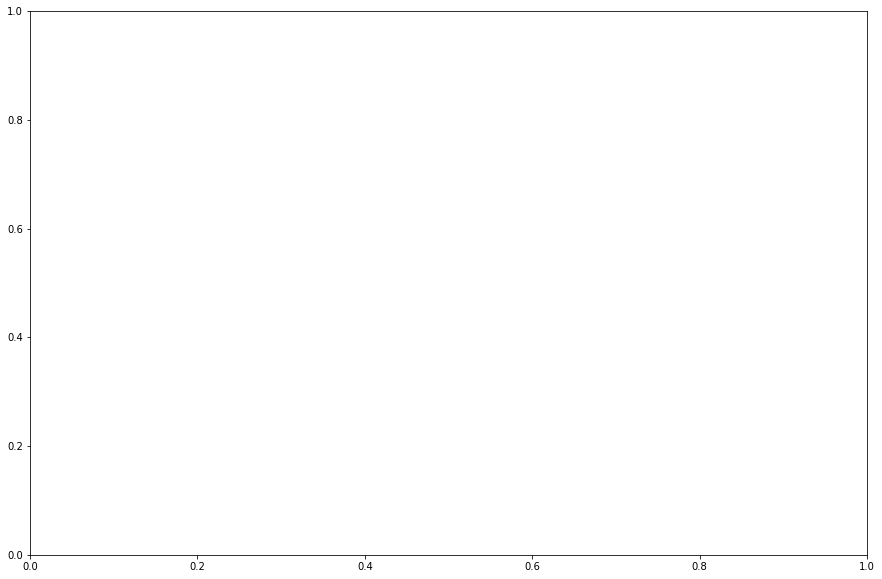

In [41]:
N = 45
x, y = np.random.rand(2, N)
c = np.random.randint(1, 8, size=N)
s = np.random.randint(10, 220, size=N)

fig, ax = plt.subplots(figsize=(15, 10))




ax = sns.catplot(x="Q001", y="NU_NOTA_MT_Random Forest", data=df_cat)
#sns.catplot( y="NU_NOTA_MT_Random Forest", data=df, color = "c")
#sns.catplot(x="Q001", y="NU_NOTA_MT_Random Forest", data=df)


#ax.add_artist(legend1)



plt.show()

KeyError: 'NU_NOTA_MT_Random Forest'

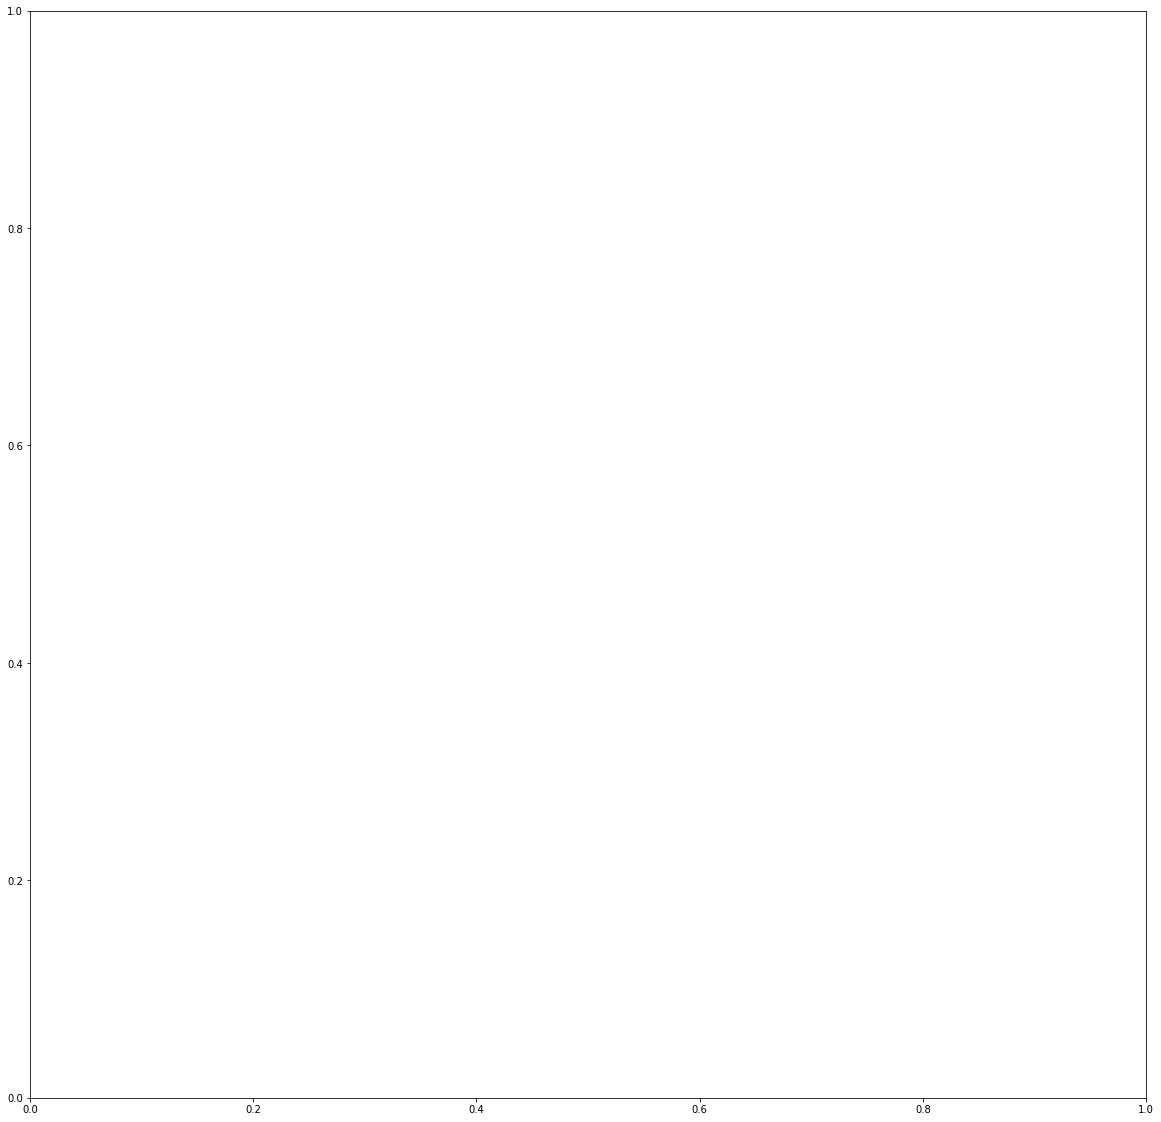

In [117]:
y_ticks = np.arange(0, len(categorical_features))
cmap = plt.cm.RdYlBu
fig, ax = plt.subplots(figsize=(20, 20))
for i in categorical_features:
    ax.scatter(X_test[i], df_resposta['NU_NOTA_MT_Random Forest'], label = i, cmap = cmap)
#ax.set_yticklabels('Q001')
#ax.set_yticks(y_ticks)

plt.grid(True)
plt.xlabel('features categóricas', fontsize=15)
plt.ylabel('NU_NOTA_MT_RF', fontsize=15)
plt.title('Gráfico de dispersão', fontsize=19)
plt.legend()
plt.show()

In [ ]:
sorted_idx
X_test.columns[sorted_idx]

# Salvar a figura a qualquer momento

In [ ]:
fig = plt.gcf()
plt.show()
fig.savefig('teste.png', format='png')

In [82]:
elapsed_time

0.5087084770202637

In [ ]:
df_resposta['NU_NOTA_MT_pred'] = y_pred
df_resposta

# Métricas

## Erro máximo

In [ ]:
#from sklearn.metrics import max_error
metrics.max_error(y_test, y_pred)

## Mean absolute error

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred_test)
mean_absolute_error(y_train, y_pred_train)

print(mean_absolute_error(y_test, y_pred_test),
mean_absolute_error(y_train, y_pred_train))

## Mean squared error

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

##  R² score, the coefficient of determination

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [34]:
#df_resposta['NU_NOTA_MT_RF'] = y_pred
#df_resposta

,NU_INSCRICAO,NU_NOTA_MT,NU_NOTA_MT_RF
993,180008416816,595.8,576.50
859,180008881225,687.7,480.00
298,180007354112,534.1,533.67
553,180008393057,542.7,522.52
672,180009238835,486.6,654.11
...,...,...,...
167,180007805560,493.2,479.30
998,180008414250,456.6,597.13
984,180008405181,485.5,514.29
491,180008379536,469.8,477.24
